In [20]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import os
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 20




In [7]:
image = cv2.imread('/home/ubuntu/data/segmentation/train/A14OK5A65AR5AOST/A14OK5A65AR5AOST.png')[..., ::-1]
mask = cv2.imread('/home/ubuntu/data/segmentation/train/A14OK5A65AR5AOST/A14OK5A65AR5AOST_mask.png')[..., 0]



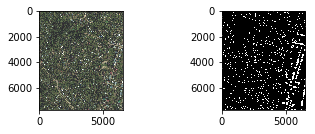

In [5]:
plt.subplot(2,2,1)
#plt.axis('off')
plt.imshow(image)
plt.subplot(2,2,2)
#plt.axis('off')
plt.imshow(mask, cmap=plt.cm.gray)

# EORA

In [6]:
def rle(inarray):
    """ run length encoding. Partial credit to R rle function. 
        Multi datatype arrays catered for including non Numpy
        returns: tuple (runlengths, startpositions, values) """
    n = len(inarray)
    if n == 0: 
        return (None, None, None)
    else:
        y = np.array(inarray[1:] != inarray[:-1])     # pairwise unequal (string safe)
        i = np.append(np.where(y), n - 1)   # must include last element posi
        z = np.diff(np.append(-1, i))       # run lengths
        p = np.cumsum(np.append(0, z))[:-1] # positions
        return(z, p, inarray[i])

def create_mask_rle(mask):
    mask_flat = mask.flatten()
    
    run_lengths, positions, elements = rle(mask_flat)

    s = ''
    for elem in zip(elements, positions, run_lengths):
        if elem[0] == 255:
            little_s = str(elem[1] + 1) + ' ' + str(elem[2]) + ' '
            s += little_s

    return s.strip()

def create_submission(mask, 
                      filename='2YNGEOYOEH0YXBJV', 
                      path='/home/ubuntu/data/segmentation/test/2YNGEOYOEH0YXBJV/'):
    out_rle = create_mask_rle(mask)
    df = pd.DataFrame([{filename + '.png': out_rle}]).T
    df.to_csv(os.path.join(path, filename + '.csv'),header=False)
    

In [24]:
my_code = create_mask_rle(mask)
my_code

'11660 44 12387 48 17034 98 17350 82 18183 44 18910 48 21821 44 22178 73 23557 97 23873 82 24705 44 25432 48 27387 66 28345 42 28700 76 30079 98 30395 82 31228 44 31955 48 33911 64 34869 40 35223 77 36602 97 36918 82 37751 44 38478 48 40435 62 41394 38 41745 79 43124 98 43441 82 44274 43 45001 48 46960 59 47918 36 48267 82 49247 2 49647 97 49966 80 50796 44 51523 48 53484 58 54442 34 54790 83 55770 4 56169 98 56493 75 57319 44 58046 48 60008 56 60967 31 61312 85 62292 7 62692 97 63019 72 63842 44 64569 48 66532 54 67491 30 67833 86 68815 9 69214 98 69546 68 70364 44 71091 49 73056 52 74015 28 74352 89 75337 12 75737 97 76073 63 76887 44 77614 48 79581 49 80539 26 80872 91 81860 14 82259 98 82599 60 83410 44 84137 48 86105 47 87064 23 87389 96 88382 18 88782 97 89126 56 89932 44 90659 49 92629 45 93588 22 93908 99 94905 20 95304 98 95652 53 96455 44 97182 48 99153 43 100112 20 100432 98 101427 23 101827 97 102179 48 102978 44 103705 48 105678 41 106637 17 106956 96 107950 25 108349 98 1

# Kaggle

In [22]:
# Run-Length Encode and Decode

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time

# ref.: https://www.kaggle.com/stainsby/fast-tested-rle
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)
 
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

# Time Test
masks = pd.read_csv('../input/train_masks.csv')
num_masks = masks.shape[0]
print('Total masks to encode/decode =', num_masks)

#time_enc = 0.0 # seconds
#time_dec = 0.0 # seconds

for r in masks.itertuples():
    t0 = time.clock()
    mask = rle_decode(r.rle_mask,(1280,1918))
    time_dec += time.clock() - t0
    t0 = time.clock()   
    mask_rle = rle_encode(mask)
    time_enc += time.clock() - t0
    assert (mask_rle == r.rle_mask)

#print('Time full encoding = {:.4f} ms per mask'.format(1000*time_enc/num_masks))
#print('Time full decoding = {:.4f} ms per mask'.format(1000*time_dec/num_masks))

In [23]:
code = rle_encode(mask)
code

'11660 44 12387 48 17034 98 17350 82 18183 44 18910 48 21821 44 22178 73 23557 97 23873 82 24705 44 25432 48 27387 66 28345 42 28700 76 30079 98 30395 82 31228 44 31955 48 33911 64 34869 40 35223 77 36602 97 36918 82 37751 44 38478 48 40435 62 41394 38 41745 79 43124 98 43441 82 44274 43 45001 48 46960 59 47918 36 48267 82 49247 2 49647 97 49966 80 50796 44 51523 48 53484 58 54442 34 54790 83 55770 4 56169 98 56493 75 57319 44 58046 48 60008 56 60967 31 61312 85 62292 7 62692 97 63019 72 63842 44 64569 48 66532 54 67491 30 67833 86 68815 9 69214 98 69546 68 70364 44 71091 49 73056 52 74015 28 74352 89 75337 12 75737 97 76073 63 76887 44 77614 48 79581 49 80539 26 80872 91 81860 14 82259 98 82599 60 83410 44 84137 48 86105 47 87064 23 87389 96 88382 18 88782 97 89126 56 89932 44 90659 49 92629 45 93588 22 93908 99 94905 20 95304 98 95652 53 96455 44 97182 48 99153 43 100112 20 100432 98 101427 23 101827 97 102179 48 102978 44 103705 48 105678 41 106637 17 106956 96 107950 25 108349 98 1

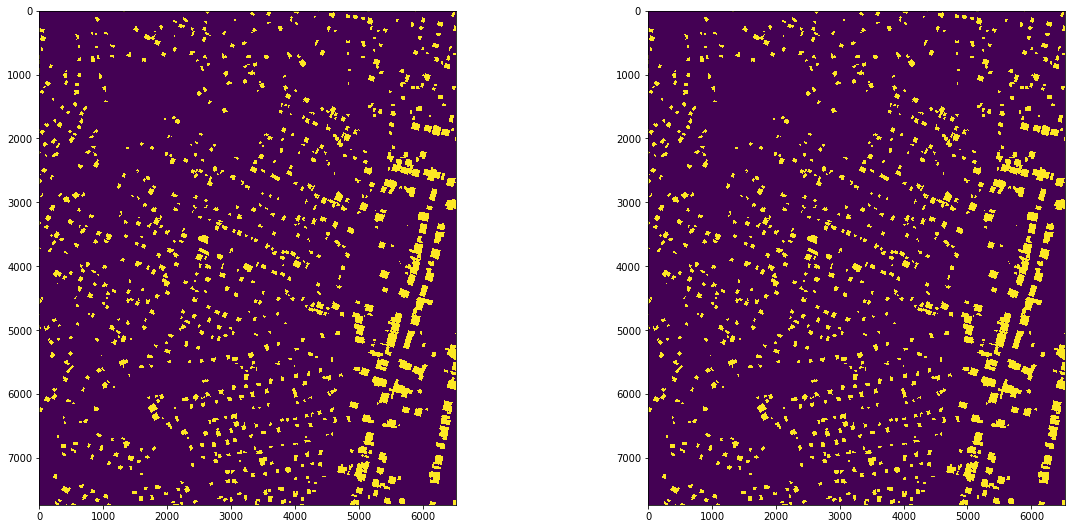

In [21]:
decode_mask = rle_decode(code, shape=mask.shape)
my_decode_mask = rle_decode(my_code, shape=mask.shape)

plt.subplot(2,2,1)
plt.imshow(decode_mask)
plt.subplot(2,2,2)
plt.imshow(my_decode_mask)